al src/
    visuali.py
    limpieza.py
    ...
del src importar al notebook
llamar las funciones bine (y quitar las def de aqui)

en las funciones, exporta los plots
df limpios?

main.py -> python main.py

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import src.cleaning as cl

***src***

In [3]:
def downloading(path):
    """This function downloads from a raw link and saves the dataframe locally.
    args:
    :url: string. the link
    :name: string. name to save the file
    """
    
    df=pd.read_csv(path, encoding='latin')
    
    return df

In [4]:
df = downloading('data/attacks.csv')
df.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
10448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def basic_cleaning(df):
    #modificamos todas las letras a minúsculas
    df=df.applymap(lambda x: x.lower() if type(x) == str else x)
    #modificamos los espacios blancos en los titulos de las las columnas por añadimos _
    df.columns = [i.lower().replace(" ", "_") for i in df.columns]
    #drops all rows from DataFrame "df" that contain all missing values (NaN)
    df = df.dropna(how='all')
    #eliminamos duplicados
    df= df.drop_duplicates()
    
    return df


In [6]:
df = basic_cleaning(df)
df.sample()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
4518,1949.01.23,23-jan-1949,1949.0,unprovoked,australia,new south wales,"bar beach, newcastle",lifesaving exhibition,ray land,m,...,"white shark, 3.6 m [11'9""]","g.p. whitley (1951); v.m. coppleson (1958), pp...",1949.01.23-land.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.01.23,1949.01.23,1785.0,NaN,NaN


In [7]:
def cleaning_df1(df):
    
    #creates a copy of the principal df named df1
    #eliminamos las columnas indicadas del df1
    df.drop(['case_number', 'date', 'year', 'area', 'location', 'activity', 'name','investigator_or_source','pdf','href_formula', 'href', 'case_number.1', 'case_number.2', 'unnamed:_22','unnamed:_23' ], axis=1, inplace=True)
    ##creamos una copia de la columna species
    df['species2']=df['species_'].copy()
    #eliminamos todas las filas de las columnas indicadas con duplicados
    df.drop_duplicates() 
    #drops all rows from df1 that contain all missing values (NaN) in the specified subset of columns ('type', 'fatal_(y/n)', 'species2') and modifies the DataFrame in place.
    df.dropna(subset=['type', 'fatal_(y/n)', 'species2'], how='all', inplace=True)
    #rename some columns
    df.rename(columns={'species_': 'species', 'fatal_(y/n)':'fatality', 'sex_' : 'sex'}, inplace=True)
    
    return df

In [8]:
df =  cleaning_df1(df)
df.sample()

,type,country,sex,age,injury,fatality,time,species,original_order,species2
4650,unprovoked,south africa,m,18,left thigh bitten,n,17h30,NaN,1653.0,NaN


In [9]:
def cleaning_df3(df):
      
    # Eliminar las filas con valores NaN en la columna species2
    df.dropna(subset=['species2'], how='all', inplace=True)
    
    #It searches for any numeric character (\d) followed by an optional character (.) and removes it
    df['species2']=df['species2'].apply(lambda x: re.sub(r'\d.?', '', x, flags=re.IGNORECASE))
    
    #deletting anything that's not a letter
    df['species2'] = df['species2'].apply(lambda x: re.sub(r'\W+', ' ', x))
    
    return df 

In [10]:
df = cleaning_df3(df)
df.sample()

,type,country,sex,age,injury,fatality,time,species,original_order,species2
5590,invalid,australia,m,NaN,"reported fatal, but this is a questionable inc...",NaN,NaN,questionable,713.0,questionable


In [11]:
def species_cleaning(df):
    
    #removes the letters 'm' and 'a' if they are found out of words.
    df['species2'] = df['species2'].str.replace(r'\s[m|a]\s', ' ', regex=True)
    df['species2'] = df['species2'].str.replace(r'^m|a\s', '', regex=True)
    df['species2'] = df['species2'].str.replace(r'\sm|as$', '', regex=True)
    
    #drops rows from df where the value in the 'species2' column is equal to any string in the "not_involved" list.
    not_involved= ['Shark involvement prior to death unconfirmed', 'shark involvement not confirmed', 'shark involvement no t confirmed', 'Shark involvement prior to death not confirmed', 'Shark involvement suspected but not confirmed', 'Invalid', 'shark involvement not confirmed']
    for case in not_involved:
        df.drop(df[df['species2'] == case].index)
    
    #creamos un diccionario con los tipos de especies y los valores con los que aparece en el dataset
    species_dict={'white shark': 'white shark|whites', 
                  'nurse shark': 'nurse|nurses',
                  'tiger shark': 'tiger|tigers',
                  'grey reef shark': 'grey|greys|gray',
                  'wobbegong shark':'wobbegong|wobbegongs',
                  'bull shark': 'bull|bulls|zambezi|zambesi',
                  'blacktip shark': 'blacktip|blacktips|black tipped',
                  'hammerhead shark': 'hammerhead|hammerheads', 
                  'mako shark': 'Mako|Makos|ako|Akos',
                  'lemon shark': 'lemon|lemons',
                  'largeako shark': 'largeako|largeakos', 
                  'oceanic whitetip shark': 'oceanic whitetip|oceanic whitetips', 
                  'whitetip reef shark':'whtietip|white tipped|whitetip reef',
                  'bronze whaler shark': 'bronze whaler|bronze whalers|bronze whale|Copper', 
                  'spinner shark': 'spinner|spinners',                 
                  'caribbean reef shark' : 'caribbean reef|caribbean reefs',                  
                  'blue shark' : 'blue pointer|blue pointers|blue shark|blue sharks|blue nose', 
                  'sandbar shark': 'brown|brown sharks|sand|sandbar',
                  'raggedtooth shark': 'raggedtooth',
                  'dog fish shark': 'dog|dogfish',                
                  'unidentified shark' : 'unidentified|unknown',
                  'small shark' : 'small shark|small sharks'
                 }
    
    # Itera sobre cada elemento de la columna species2 del dataframe y reemplaza los valores
    for key, value in species_dict.items():
        mask= df['species2'].str.contains(value, case=False)
        df.loc[mask, 'species2'] = key

    #modificamos las celdas donde aparece una especie
    for specie, word in species_dict.items():   
        df.loc[df['species2'].str.contains(word, case=False), 'species2'] = specie
    
    
    #keeps only the words with more than two characters and then joins them back together with spaces
    df['species2'] = df['species2'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))
    
    
    
    return df

In [12]:
df = species_cleaning(df)
df.sample()

,type,country,sex,age,injury,fatality,time,species,original_order,species2
25,unprovoked,usa,m,29,lacerations to right lower leg,n,NaN,6' shark,6278.0,shark


In [13]:
def type_species_cleaning(df):

    #drops rows from df where the value in the 'type' column is equal to 'invalid', and modifies the df3.
    df.drop(df[df['type'] =='invalid'].index, inplace=True)
    
    #we eliminate rows with species2 column with Nan 
    df.dropna(subset=['species2'], how='all', inplace=True)
    
    #we remove the unique values that have less than 6 elements on the species2 column in df
    species_counts= {}
    for i,x in df['species2'].value_counts().items():
        species_counts[i]=x
        
    new_dict = {}
        
    for key, value in species_counts.items():
        if type(value) == int:
            if value >= 6:
                new_dict[key] = value

    
    #we remove those unique values that are not shark species
    species_list = list(new_dict.keys())
    species_list.remove('shark')
    species_list.remove('')
    species_list.remove('sharks')
    species_list.remove('small shark')
    species_list.remove('unidentified shark')
    species_list.remove('shark involvement not confirmed')
    
    df = df[df['species2'].isin(species_list)]
    
    
    df.drop(['age', 'time'], axis=1, inplace=True)

    return df

In [14]:
df = type_species_cleaning(df)
df.sample()

C:\Users\pagob\AppData\Local\Temp\ipykernel_11776\3072587750.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['age', 'time'], axis=1, inplace=True)


,type,country,sex,injury,fatality,species,original_order,species2
3768,provoked,new zealand,NaN,minor lacerations to hand and arm after he sei...,n,"grey nurse shark, 1.8 m [6']",2535.0,nurse shark


In [15]:
species_counts= {}
for i,x in df['species2'].value_counts().items():
    species_counts[i]=x
        
print(species_counts) 

{'white shark': 628, 'tiger shark': 283, 'bull shark': 208, 'blacktip shark': 104, 'nurse shark': 97, 'bronze whaler shark': 69, 'mako shark': 53, 'blue shark': 52, 'wobbegong shark': 49, 'hammerhead shark': 48, 'raggedtooth shark': 43, 'lemon shark': 34, 'sandbar shark': 30, 'grey reef shark': 29, 'oceanic whitetip shark': 24, 'spinner shark': 21, 'caribbean reef shark': 16, 'reef shark': 13, 'dog fish shark': 10, 'sevengill shark': 9, 'whitetip reef shark': 7, 'dusky shark': 7, 'basking shark': 7, 'carpet shark': 7, 'angel shark': 6, 'galapagos shark': 6}


In [16]:
def fatality_sex_cleaning(df):
    #modificamos los datos de la columna fatality
    mask_unknown = (df['fatality'] == '2017')
    
    # Reemplazar las palabras en las filas seleccionadas
    df.loc[mask_unknown, 'fatality'] = 'unknown'
    
    #modificamos los datos de la columna fatality
    mask_no = (df['fatality'] == ' n')
    
    # Reemplazar las palabras en las filas seleccionadas
    df.loc[mask_no, 'fatality'] = 'n'
    
    #modificamos los datos de la columna fatality
    mask_unknown2 = (df['fatality'] == 'm')
    
    # Reemplazar las palabras en las filas seleccionadas
    df.loc[mask_unknown2, 'fatality'] = 'unknown'
    
    df['sex']=df['sex'].str.replace(r'm\s', 'm', regex=True)
    df['sex']=df['sex'].str.replace(r'n', 'unknown', regex=True)
    df['sex']=df['sex'].str.replace(r'lli', 'unknown', regex=True)
    
    return df

In [17]:
df = fatality_sex_cleaning(df)
df.sample()

,type,country,sex,injury,fatality,species,original_order,species2
1736,unprovoked,usa,f,"left thigh abraded, right knee and right index...",n,"1.2 m [4'] ""grey-colored shark""",4567.0,grey reef shark


In [18]:
def visualization_cleaning(df):
    #creamos un df con la variable especies y fatality
    df = df.loc[:, ['species2', 'fatality']]
    df.rename(columns={'species2': 'species'}, inplace=True)
    
    #modificamos los datos de la columna fatality por integers
    no_fatality = (df['fatality'] == 'n')
    # Reemplazar las palabras en las filas seleccionadas
    df.loc[no_fatality, 'fatality'] = 0
    
    #modificamos los datos de la columna fatality por integers
    yes_fatality = (df['fatality'] == 'y')
    # Reemplazar las palabras en las filas seleccionadas
    df.loc[yes_fatality, 'fatality'] = 1
    
    return df

In [19]:
df = visualization_cleaning(df)
df.sample()

,species,fatality
3396,wobbegong shark,unknown


In [72]:
def species_vs_attacks(df):
    # Plot the countplot using the custom color palette
    ax = sns.countplot(y=df['species'], order=df['species'].value_counts(ascending=True).index, palette='mako_r')
    
    # Set axis labels and title
    ax.set(ylabel='Shark species', xlabel='Number of attacks')
    
    # Rotate x-axis tick labels for better readability
    plt.xticks(rotation=90)
    plt.title('Shark species vs number of attacks')
    
    plt.ylabel('Shark species', weight='bold')
    plt.xlabel('Number of attacks', weight='bold')
    
    
    # Display the plot
    plt.show()


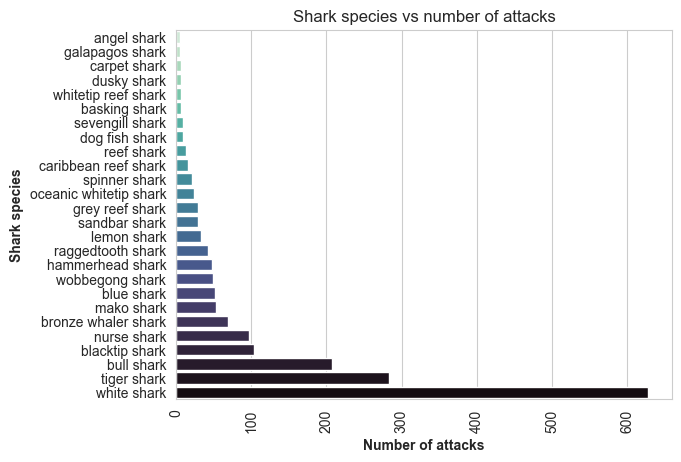

In [73]:
species_vs_attacks(df)

In [74]:
def species_vs_attacks2(df):
    sharks = df["species"].value_counts()
    # Sum the counts of all species that make up less than 10% of the total
    other_count = sharks[sharks/sum(sharks) < 0.04].sum()
    # Group these species into a new category called "Other"
    sharks = sharks[sharks/sum(sharks) >= 0.04]
    sharks["Other"] = other_count
    # Plot the pie chart
    
    sharks.index = sharks.index.str.capitalize()
    pie = sharks.plot.pie(autopct="%.1f%%", textprops={'color': 'black', 'fontsize': 10, 'va': 'center'})
    
    palette='mako_r'
    plt.title('Shark species vs number of attacks')
    
    plt.show()   


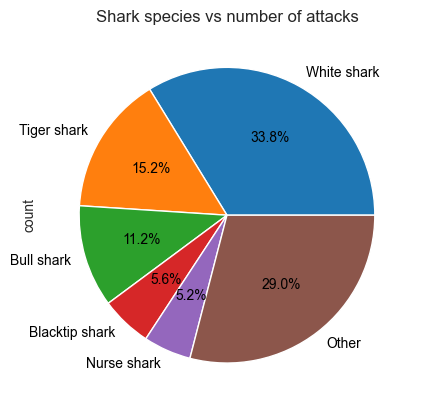

In [75]:
species_vs_attacks2(df)

In [76]:
def species_vs_attacks_fatality(df):
    #NO TOCAR
    # Group these species into a new category called "Other" 
    sns.histplot(data=df, x="species", hue="fatality", multiple="stack");
    plt.xticks(rotation=90);
    plt.title('Shark species vs number of attacks and fatality')
    plt.xlabel('shark species')
    plt.ylabel('attacks');
    plt.show()

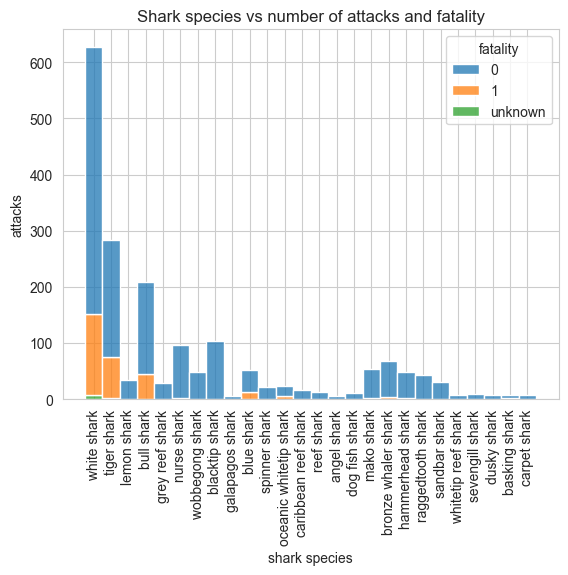

In [77]:
species_vs_attacks_fatality(df)

In [80]:
def species_vs_fatalities(df):
    
    # calcula el total de cada valor en la columna 'fatality'
    fatality_counts = df['fatality'].value_counts()
    
    # muestra solo los valores en la columna 'fatality' si el total es 1 o más
    for index, count in fatality_counts.items():
        if index!='unknown':
            if index and count >= 1:
                sns.histplot(data=df[df['fatality'] == index], x="species", palette='mako_r')
                plt.xticks(rotation=90)
                plt.title('Shark species vs number of fatalities caused')
                plt.xlabel('Shark specie')
                plt.ylabel('Number of fatalities')
                
       
    plt.show()

C:\Users\pagob\AppData\Local\Temp\ipykernel_11776\299831991.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df['fatality'] == index], x="species", palette='mako_r')


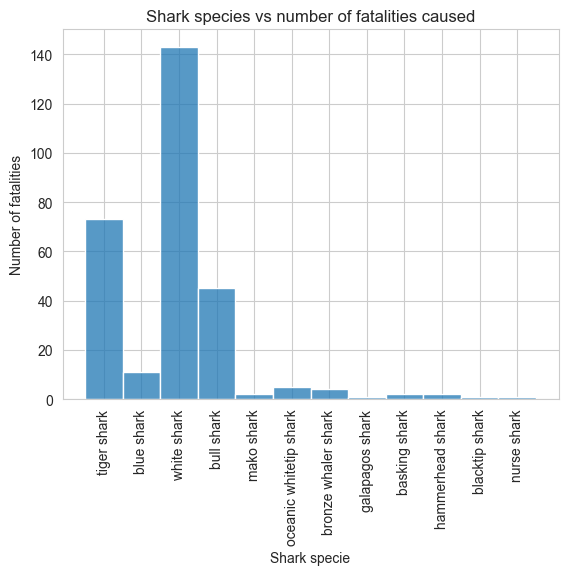

In [81]:
fatalities(df)

In [96]:
def fatalities_vs_sex(df):
    
    # calcula el total de cada valor en la columna 'fatality'
    fatality_counts = df['fatality'].value_counts()
    
    # muestra solo los valores en la columna 'fatality' si el total es 1 o más
    for index, count in fatality_counts.items():
        if index!='unknown':
            if index and count >= 1:
                sns.histplot(data=df[df['fatality'] == index], x="sex", palette="mako_r")
                plt.xticks(rotation=90)
                plt.title('Shark species vs number of fatalities caused')
                plt.xlabel('Shark specie')
                plt.ylabel('Number of fatalities')
                
       
    plt.show()

In [97]:
fatalities_vs_sex(df)

ValueError: Could not interpret value `sex` for parameter `x`